In [1]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.probability import FreqDist
import string
import re
import numpy as npy
from PIL import Image

In [2]:
from google.colab import files
# Create data on to Google Drive
from google.colab import drive
# Mount your Drive to the Colab VM.
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
processedTxtPath = "/gdrive/MyDrive/06_ai/assets/native-seattle-processed.txt"
wcPath = "/gdrive/MyDrive/06_ai/assets/native-seattle.png"

loading text data...
index indigenous community affiliations of individuals are given where known these affilia tions do not imply tribal enrollment or other legal status nor does lack of listed affiliation necessarily imply nonindian status admiral neighborhood african americans alaska native migrants from raids by indigenous people from tourist and other journeys from seattle to seattle claims on economic connections to see also specific indige nous peoples alaskayukonpacific exposition aype displays of native peoples and things at native participation in alcatraz island alcohol bow and arrow joints indian taverns alexie sherman spokanecoeur dalene alki john duwamish alki point see prairie point alki womens improvement club allen george american indian movement american indian womens service league aiwsl angolook oliver iñupiat anishinaabechippewa people aquino ella arapaho people archaeology other than human remains artifacts uncovered by urban growth as evidence of precontact migra

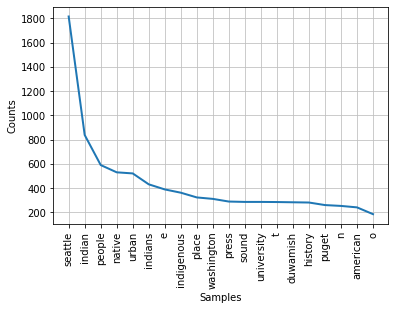

generating wordcloud...
completed!


In [4]:
# load the dataset
print("loading text data...")
txt = open(processedTxtPath, "r", encoding="utf8").read()

# Convert text to lowercase
# txt = txt.lower()
# Remove numbers
txt = re.sub(r'\d+', '', txt)

# Remove punctuation
txt = re.sub(r'[^\w\s]', '', txt)

# delete the white spaces
# https://www.journaldev.com/23763/python-remove-spaces-from-string#python-remove-whitespaces-from-string-using-regex
txt = " ".join(txt.split())
txt.translate({ord(c): None for c in string.whitespace})

txt = txt.replace("gays", "gay").replace("lesbians", "lesbian").replace("seattles", "seattle").replace("citys", "city")
print(txt)

stopwords = set(STOPWORDS)
commonwords = {"time", "one", "began", "among", "another", "see", "part", "many", "day", "day", "way", "times",
               "still", "news", "three", "came", "became", "made", "wanted", "seemed", "made", "now", "society",
               "ing", "time", "first", "new", "called", "said", "come", "two", "city", "group", "state", "year",
               "case", "member", "even", "later", "month", "years", "much", "week", "county", "name", "example"
               "well", "members", "us", "say", "s"}
stopwords.update(commonwords)

# download corporas
import nltk
nltk.download('punkt')

# tokenize and calculate the word frequencies
tokens = nltk.tokenize.word_tokenize(txt)
fDist = FreqDist(tokens)
print(fDist.most_common(20))

# remove the stop words and common words
filtered_fDist = nltk.FreqDist(dict((word, freq) for word, freq in fDist.items() if word not in stopwords))

print(filtered_fDist)
filtered_fDist.plot(20)

print("generating wordcloud...")

mask_array = npy.array(Image.open("/gdrive/MyDrive/06_ai/img/cloud.jpg"))
wc = WordCloud(font_path='/gdrive/MyDrive/06_ai/assets/verdana.ttf', background_color="white", max_words=50, prefer_horizontal=1, mask=mask_array, scale=3, stopwords=stopwords, collocations=False)
wc.generate_from_frequencies(filtered_fDist)
# wc.generate(txt)
wc.to_file(wcPath)
print("completed!")